# Trainning and hyperparameter tuning Random Forest Model

In [1]:
# Setup

import os
import sys

import pandas as pd
import numpy as np

# Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz


sys.path.append('../')
from src.feature import threshold_mapping

In [2]:
parent_abs = os.path.abspath(os.path.join(os.getcwd(),os.pardir))
df = pd.read_csv(os.path.join(parent_abs,'data\\featured.csv'),index_col=0)
df.head()

,bayley_3_t1,dominance_simpson,12DICHLORETHDEG-PWY,AEROBACTINSYN-PWY,ALLANTOINDEG-PWY,CRNFORCAT-PWY,DENITRIFICATION-PWY,DHGLUCONATE-PYR-CAT-PWY,DTDPRHAMSYN-PWY,METH-ACETATE-PWY,...,delivery_mode,chaos_tot_t1,epds_2c_t1,bisq_3_mins_t1,bisq_4_mins_t1,bisq_9_mins_t1,bisq_sleep_prob_t1,ebia_tot_t1,educationLevelAhmedNum_t1,a10_t1
0,100,0.136112,0.0,0.000000,7.676483,0.0,0.000000,0.0,4395.178167,0.0,...,1,4.0,0,480.0,540.0,239.0,1.0,0,16,3
1,75,0.451324,0.0,0.000000,14.984719,0.0,320.494755,0.0,4478.753445,0.0,...,1,1.0,0,570.0,240.0,60.0,0.0,0,20,1
2,95,0.281675,0.0,209.593817,0.000000,0.0,0.000000,0.0,2755.525229,0.0,...,1,2.0,0,720.0,90.0,30.0,0.0,0,16,1
3,115,0.945041,0.0,0.000000,0.000000,0.0,26.374059,0.0,2725.705501,0.0,...,3,0.0,0,600.0,360.0,30.0,0.0,2,16,5
4,105,0.338783,0.0,0.000000,0.000000,0.0,0.000000,0.0,725.879153,0.0,...,1,7.0,0,420.0,480.0,120.0,1.0,0,12,2


In [3]:
# Parameters

# Taking value at quantile q
q = 0.2

# If true, all values less than quantile will return 1, others 0
less_than = True

In [4]:
runned1 = False
y_index = 0
if not runned1:
    df = threshold_mapping(df, quantile=q, y_index=y_index, less_than=less_than)


print("Total number of trues : ", df.iloc[:,y_index].sum())

Total number of trues :  59


In [5]:
y = df.iloc[:,0]
X = df.iloc[:,1:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [7]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(X_test)

In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8412698412698413


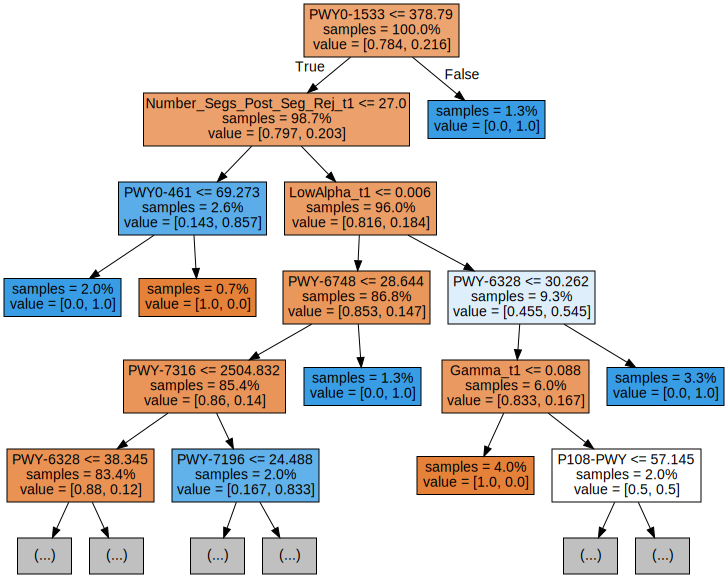

In [10]:
tree = rf.estimators_[0]
dot_data = export_graphviz(tree,feature_names=X_train.columns,filled=True,max_depth=5,impurity=False,proportion=True)

graph = graphviz.Source(dot_data)
display(graph)

# Hyperparameter Tuning

param_dist = {'n_estimators':randint(20,500), 'max_depth':randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist, n_iter=5, cv=5)

rand_search.fit(X_train, y_train)

# Evaluating

best_rf = rand_search.best_estimator_
print('Best hyperparameters:', rand_search.best_params_)


y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

In [12]:
import pickle

last_rf = rf
last_rf.feature_names = list(X_train.columns)

relative_path = r"models\rf_v01.pkl"

path = os.path.join(parent_abs,relative_path)

print(f"\n model path: {path}")

with open(path, 'wb') as file:
    pickle.dump(last_rf, file)


 model path: c:\Users\ptons\Code\repositories\brainwise\models\rf_v01.pkl
